# ECG preprocessing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import afdetection.utils.paths as path
from afdetection.data.make_dataset import MakeDataset
from afdetection.data.signal_preprocessing import SignalPreprocessing

sns.set_theme()

In [3]:
# Instantiate objects
make_data = MakeDataset()
preprocessing = SignalPreprocessing()

# Leads names
leads = [
    'I',
    'II', 
    'III', 
    'aVF', 
    'aVR', 
    'aVL', 
    'V1', 
    'V2', 
    'V3', 
    'V4', 
    'V5', 
    'V6', 
]

fs = 500

## Load ECGs

In [4]:
ecg_data_DIR = path.data_raw_dir('ecgeq-500hzsrfava.npy')
ecg = make_data.read_from_np(ecg_data_DIR)

m, n, lead = ecg.shape
dur = n/fs
t = np.arange(0, dur, 1/fs)

print('shape: {}'.format(ecg.shape))
print('Duration: {}'.format(dur))

shape: (6428, 5000, 12)
Duration: 10.0


## Mean removal

In [5]:
ecg = preprocessing.mean_removal(ecg)

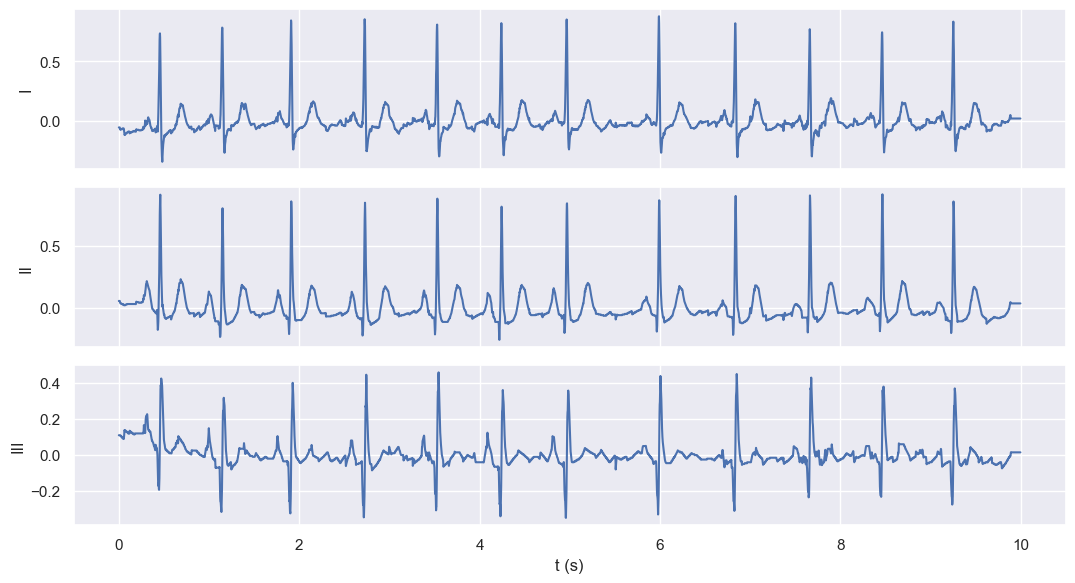

In [6]:
idx = np.random.randint(0, m)

fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(t, ecg[idx, :, i].ravel())
    ax[i].set_ylabel(leads[i])
ax[i].set_xlabel('t (s)')
plt.tight_layout()
plt.show()

## Wander removal

In [7]:
ecg = preprocessing.wander_removal(ecg, fs)

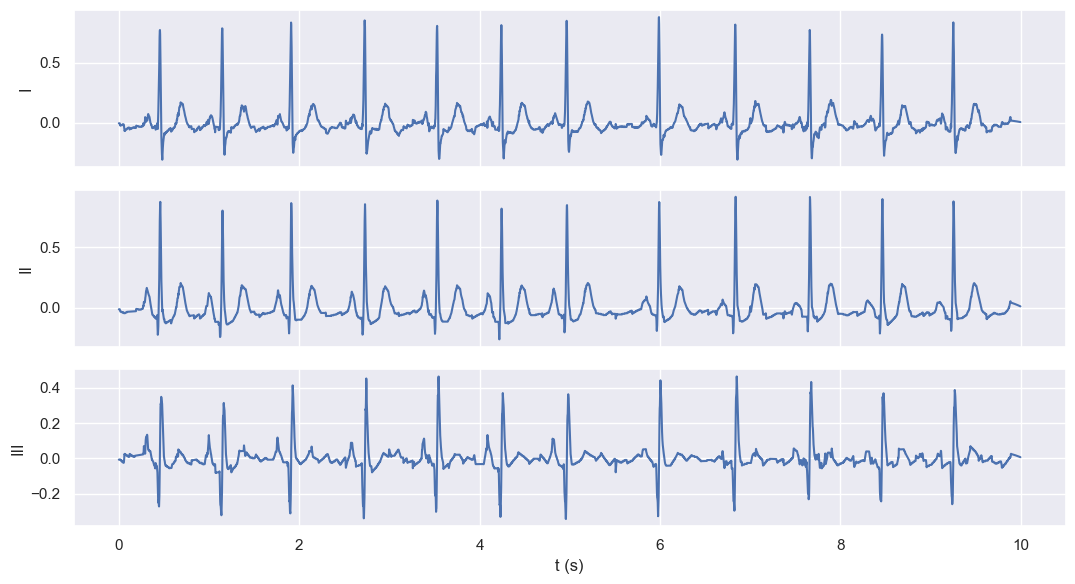

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(t, ecg[idx, :, i].ravel())
    ax[i].set_ylabel(leads[i])
ax[i].set_xlabel('t (s)')
plt.tight_layout()
plt.show()

## Pan–Tompkins algorithm

In [9]:
w = int((150/1000)*fs)  # Moving average window size (150ms)
ecg = preprocessing.pan_tompkins(ecg, fs, w)

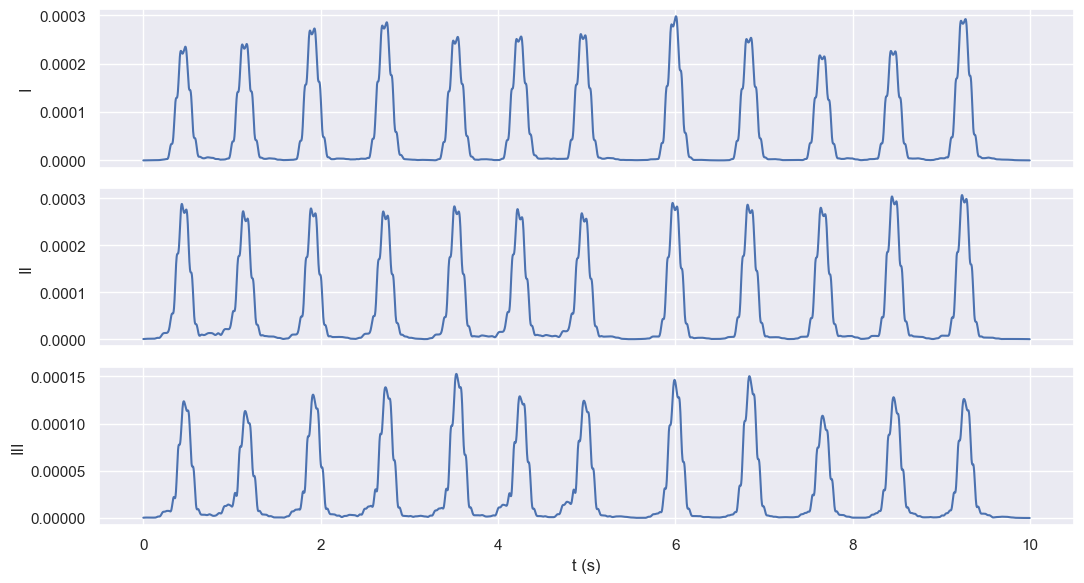

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(t, ecg[idx, :, i].ravel())
    ax[i].set_ylabel(leads[i])
ax[i].set_xlabel('t (s)')
plt.tight_layout()
plt.show()

## Remove first and last second of the ECGs

In [11]:
ecg = ecg[:, 1*fs:-1*fs, :]
m, n, lead = ecg.shape
dur = n/fs
t = np.arange(0, dur, 1/fs)

print('shape: {}'.format(ecg.shape))
print('Duration: {}'.format(dur))

shape: (6428, 4000, 12)
Duration: 8.0


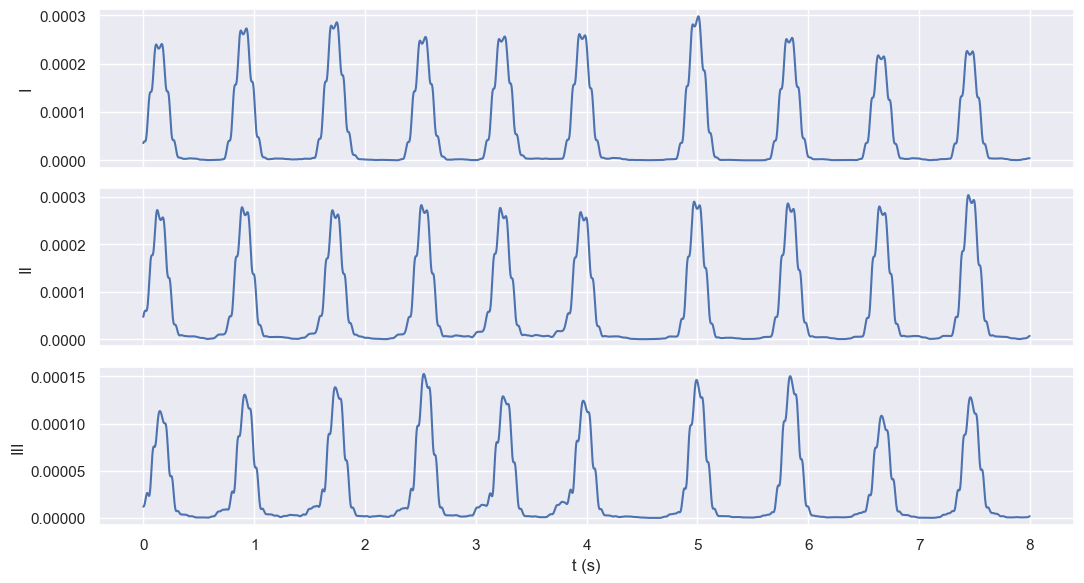

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(t, ecg[idx, :, i].ravel())
    ax[i].set_ylabel(leads[i])
ax[i].set_xlabel('t (s)')
plt.tight_layout()
plt.show()